In [2]:
from qiskit import IBMQ
IBMQ.save_account('4a0a818b1d1a7766e8274535f2e9a7a4a625d381fec20e64c9fc1daaaed0b4b205a81931a0ba343e844dc85c8a32cf4a99dfc298aea947d1492c77bdcd18311f')

configrc.store_credentials:WARNING:2023-01-19 15:04:11,349: Credentials already present. Set overwrite=True to overwrite.


In [14]:
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

In [4]:
IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q')

# Pick least busy backend
small_devices = provider.backends(min_num_qubits=5, simulator=False, operational=True)
backend = least_busy(small_devices)
print(f'Least busy backend: {backend}')

Least busy backend: ibm_nairobi


In [20]:
def his_sim(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(circuit)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts()
    return counts

In [5]:
def encode(qc, qreg_q):
    qc.cx(qreg_q[0], qreg_q[1])
    qc.cx(qreg_q[3], qreg_q[4])
    qc.cx(qreg_q[0], qreg_q[2])
    qc.cx(qreg_q[3], qreg_q[5])

    return qc

def decode(qc, qreg_q):
    qc.cx(qreg_q[0], qreg_q[1])
    qc.cx(qreg_q[3], qreg_q[4])
    qc.cx(qreg_q[0], qreg_q[2])
    qc.cx(qreg_q[3], qreg_q[5])

    qc.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
    qc.ccx(qreg_q[5], qreg_q[4], qreg_q[3])

    return qc
    

In [6]:
def logical_h(qc, qreg_q):
    qc.cx(qreg_q[0], qreg_q[1])
    qc.cx(qreg_q[3], qreg_q[4])
    qc.cx(qreg_q[0], qreg_q[2])
    qc.cx(qreg_q[3], qreg_q[5])
    qc.h(qreg_q[0])
    qc.h(qreg_q[3])
    qc.cx(qreg_q[0], qreg_q[1])
    qc.cx(qreg_q[3], qreg_q[4])
    qc.cx(qreg_q[0], qreg_q[2])
    qc.cx(qreg_q[3], qreg_q[5])
    
    return qc

def logical_cz(qc, qreg_q):
    qc.cz(qreg_q[0], qreg_q[3])
    qc.cz(qreg_q[1], qreg_q[4])
    qc.cz(qreg_q[2], qreg_q[5])

    return qc

def logical_z(qc, qreg_q):
    qc.z(qreg_q[0])
    qc.z(qreg_q[3])

    return qc

def measure(qc, qreg_q, creg_c):
    qc.measure(qreg_q[0], creg_c[0])
    qc.measure(qreg_q[3], creg_c[1])

    return qc

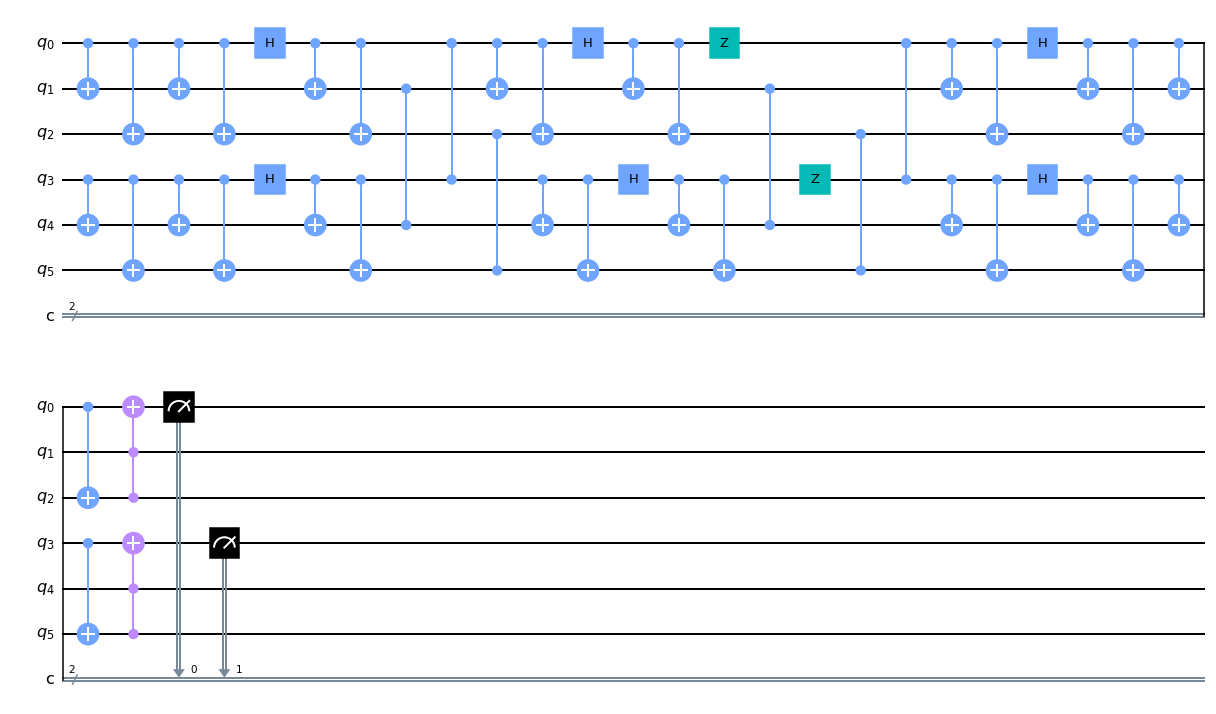

In [22]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit = encode(circuit, qreg_q)
circuit = logical_h(circuit, qreg_q)
circuit = logical_cz(circuit, qreg_q)
circuit = logical_h(circuit, qreg_q)
circuit = logical_z(circuit, qreg_q)
circuit = logical_cz(circuit, qreg_q)
circuit = logical_h(circuit, qreg_q)
circuit = decode(circuit, qreg_q)
circuit = measure(circuit, qreg_q, creg_c)

circuit.draw(output='mpl')



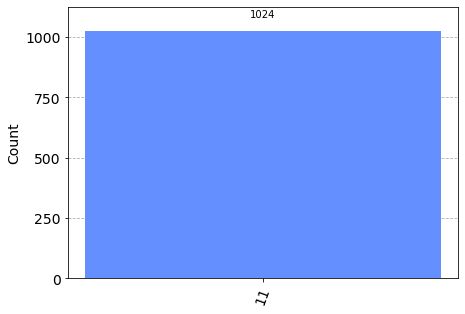

In [21]:
counts = his_sim(circuit)
plot_histogram(counts)

In [8]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# encode
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])

# hadamard
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])

# controlled z
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])

# Hadamard
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])

# z gate
circuit.z(qreg_q[0])
circuit.z(qreg_q[3])

# controlled z
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])

# Hadamard
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[1])

circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])

print(circuit)


                         ┌───┐                          ┌───┐          ┌───┐   »
q_0: ──■────■────■────■──┤ H ├──■────■──────■───■────■──┤ H ├──■────■──┤ Z ├───»
     ┌─┴─┐  │  ┌─┴─┐  │  └───┘┌─┴─┐  │      │ ┌─┴─┐  │  └───┘┌─┴─┐  │  └───┘   »
q_1: ┤ X ├──┼──┤ X ├──┼───────┤ X ├──┼───■──┼─┤ X ├──┼───────┤ X ├──┼────────■─»
     └───┘┌─┴─┐└───┘┌─┴─┐     └───┘┌─┴─┐ │  │ └───┘┌─┴─┐     └───┘┌─┴─┐      │ »
q_2: ─────┤ X ├─────┤ X ├──────────┤ X ├─┼──┼───■──┤ X ├──────────┤ X ├──────┼─»
          └───┘     └───┘┌───┐     └───┘ │  │   │  └───┘     ┌───┐└───┘      │ »
q_3: ──■────■────■────■──┤ H ├──■────■───┼──■───┼────■────■──┤ H ├──■────■───┼─»
     ┌─┴─┐  │  ┌─┴─┐  │  └───┘┌─┴─┐  │   │      │  ┌─┴─┐  │  └───┘┌─┴─┐  │   │ »
q_4: ┤ X ├──┼──┤ X ├──┼───────┤ X ├──┼───■──────┼──┤ X ├──┼───────┤ X ├──┼───■─»
     └───┘┌─┴─┐└───┘┌─┴─┐     └───┘┌─┴─┐        │  └───┘┌─┴─┐     └───┘┌─┴─┐   »
q_5: ─────┤ X ├─────┤ X ├──────────┤ X ├────────■───────┤ X ├──────────┤ X ├───»
          └───┘     └───┘   